In [ ]:
import os      
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, VGG19
#from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mat
import argparse
#import Augmentor
import cv2
import os
import pandas as pd
import shutil
import random
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os


ModuleNotFoundError: ignored

In [ ]:
normal = '/content/drive/MyDrive/COVID-ChestXray-15k-dataset/test/NORMAL'
PNEUMONIA = '/content/drive/MyDrive/COVID-ChestXray-15k-dataset/test/PNEUMONIA'
covid = '/content/drive/MyDrive/COVID-ChestXray-15k-dataset/test/COVID'
# Path list
dir_normal = os.listdir(normal)
dir_PNEUMONIA = os.listdir(PNEUMONIA)
dir_covid = os.listdir(covid)

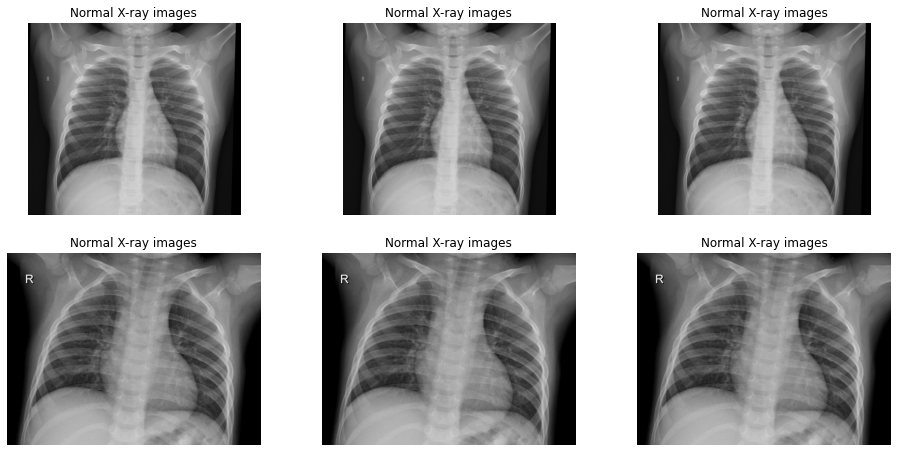

In [ ]:
mat.figure(figsize=(16,12))
for i in range(6):
    ran = random.choice((1,30))
    normal1 = [os.path.join(normal, f) for f in dir_normal[ran:ran+1]]
    rand = random.choice(normal1)
    mat.subplot(3, 3, i+1)
    img = mat.imread(rand)
    mat.imshow(img,cmap = 'gray')
    mat.axis(False)
    mat.title('Normal X-ray images')
mat.show()

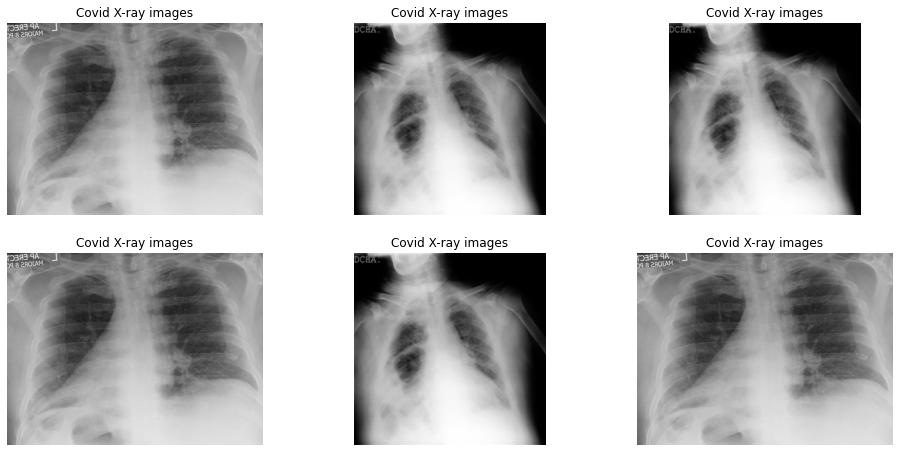

In [ ]:
mat.figure(figsize=(16,12))
for i in range(6):
    ran = random.choice((1,30))
    covid1 = [os.path.join(covid, f) for f in dir_covid[ran:ran+1]]
    rand = random.choice(covid1)
    mat.subplot(3, 3, i+1)
    img = mat.imread(rand)
    mat.imshow(img,cmap = 'gray')
    mat.axis(False)
    mat.title('Covid X-ray images')
mat.show()

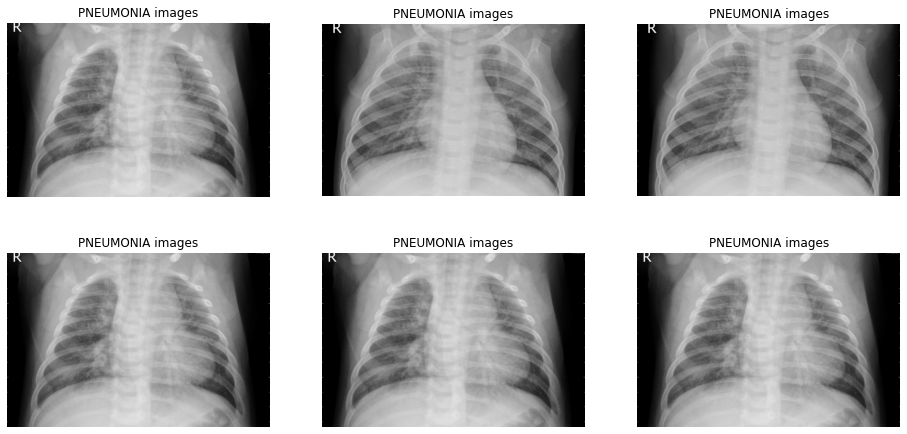

In [ ]:
mat.figure(figsize=(16,12))
for i in range(6):
    ran = random.choice((1,30))
    covid1 = [os.path.join(PNEUMONIA, f) for f in dir_PNEUMONIA[ran:ran+1]]
    rand = random.choice(covid1)
    mat.subplot(3, 3, i+1)
    img = mat.imread(rand)
    mat.imshow(img,cmap = 'gray')
    mat.axis(False)
    mat.title('PNEUMONIA images')
mat.show()

In [ ]:
imagePaths = list(paths.list_images(normal))
data = []
labels = []
for imagePath in imagePaths:
    label = 0
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
data = np.array(data) /255
labels = np.array(labels)

In [ ]:
imagePaths1 = list(paths.list_images(covid))
data1 = []
labels1 = []
for imagePath in imagePaths1:
    label1 = 1
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data1.append(image)
    labels1.append(label1)

data1 = np.array(data1) / 255
labels1 = np.array(labels1)

In [ ]:
imagePaths2 = list(paths.list_images(PNEUMONIA))
data2 = []
labels2 = []
for imagePath in imagePaths2:
    label2 = 2
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data2.append(image)
    labels2.append(label2)
data2 = np.array(data2) / 255
labels2 = np.array(labels2)

In [ ]:
dataset = np.concatenate((data, data1, data2), axis=0)
label = np.concatenate((labels, labels1, labels2), axis=0)

In [ ]:
label = to_categorical(label)
label

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(dataset, label, test_size=0.20, stratify=label, random_state=42)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.20, random_state=42)

In [ ]:
testY

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
EPOCHS = 5
BS = 8
#baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
baseModel = VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
#baseModel = DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

callbacks = [EarlyStopping(monitor='val_loss', patience=8),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

for layer in baseModel.layers:
    layer.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# compile our model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the head of the network
H = model.fit(trainX, trainY, validation_data=(valX,valY),batch_size = BS, epochs=EPOCHS,callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
81/81 [==============================] - 505s 6s/step - loss: 0.8908 - accuracy: 0.5953 - val_loss: 0.7521 - val_accuracy: 0.6914
Epoch 2/5
81/81 [==============================] - 504s 6s/step - loss: 0.6875 - accuracy: 0.7132 - val_loss: 0.5490 - val_accuracy: 0.8333
Epoch 3/5
81/81 [==============================] - 505s 6s/step - loss: 0.5615 - accuracy: 0.8031 - val_loss: 0.4392 - val_accuracy: 0.8333
Epoch 4/5
81/81 [==============================] - 505s 6s/step - loss: 0.4801 - accuracy: 0.8264 - val_loss: 0.3586 - val_accuracy: 0.9074
Epoch 5/5
81/81 [==============================] - 505s 6s/step - loss: 0.4377 - accuracy: 0.8465 - val_loss: 0.2930 - val_accuracy: 0.9259


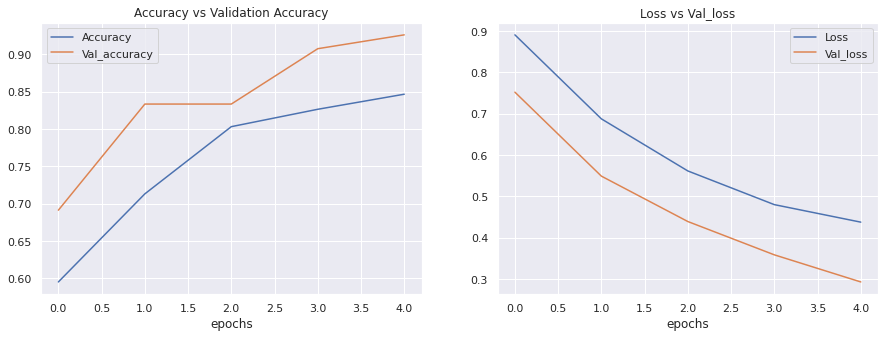

In [ ]:
accuracy = H.history['accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
val_acc = H.history['val_accuracy']
epochs = range(len(H.epoch))

title1 = 'Accuracy vs Validation Accuracy'
leg1 = ['Accuracy', 'Val_accuracy']
title2 = 'Loss vs Val_loss'
leg2 = ['Loss', 'Val_loss']

def plot(epochs, acc, val_acc, leg, title):
    mat.plot(epochs, acc)
    mat.plot(epochs, val_acc)
    mat.title(title)
    mat.legend(leg)
    mat.xlabel('epochs')

mat.figure(figsize=(15,5))
mat.subplot(1,2,1)
plot(epochs, accuracy, val_acc , leg1, title1)
mat.subplot(1,2,2)
plot(epochs, loss, val_loss, leg2, title2)
mat.show()

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,digits=4))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0     0.9381    0.9636    0.9507       110
           1     0.9583    0.8214    0.8846        28
           2     0.8923    0.9062    0.8992        64

    accuracy                         0.9257       202
   macro avg     0.9296    0.8971    0.9115       202
weighted avg     0.9264    0.9257    0.9252       202



acc: 0.6386
sensitivity: 1.0000
specificity: 0.9200


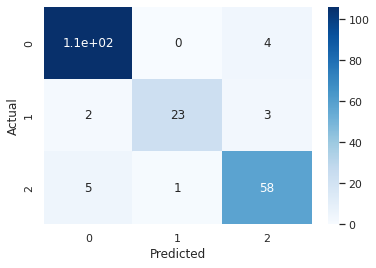

<Figure size 1152x864 with 0 Axes>

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
import seaborn as sns
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
sns.set(font_scale=1)#for label size
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font siz
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize = (16,12))
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Total-test-data; 202 	accurately-predicted-data: 187 	 wrongly-predicted-data:  15
Accuracy: 92.574 %


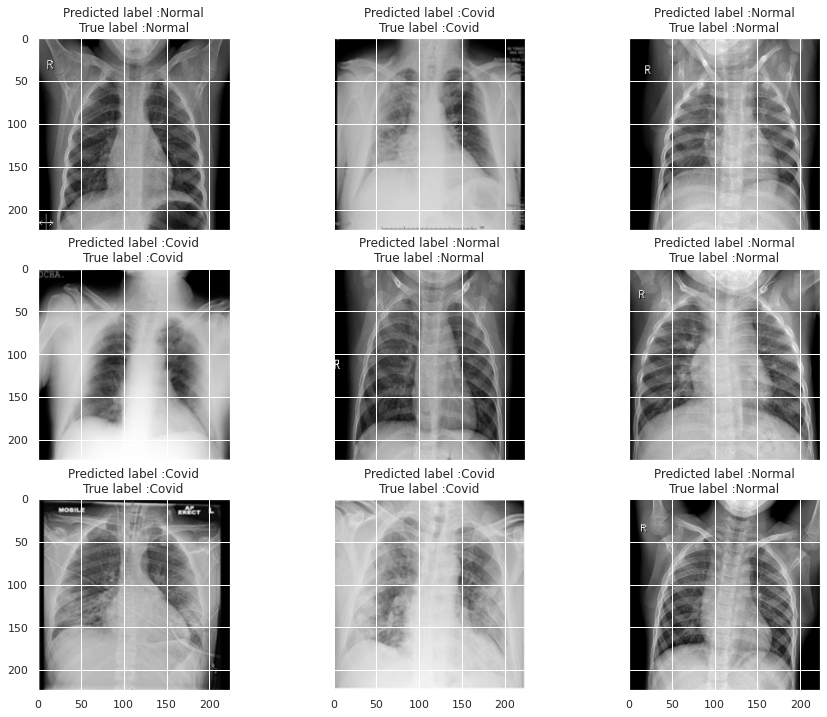

In [ ]:
ypred = model.predict(testX)
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(testY[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')
label= {0: 'Normal', 1: 'Covid', 2: 'Pneumonia'}
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(testX[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(testY[imidx[n]])]))
            n += 1

plt.show()